#### Import de bibliotecas

In [1]:
from skimage import data, io
import numpy as np
import cv2
import matplotlib.pyplot as plt

#### Import de imagem disponível no pacote: skimage - imagem considerada nos exercícios 2 e 3.

In [2]:
img_coins = data.coins()

#### Matriz da imagem importada

In [3]:
img_coins

array([[ 47, 123, 133, ...,  14,   3,  12],
       [ 93, 144, 145, ...,  12,   7,   7],
       [126, 147, 143, ...,   2,  13,   3],
       ...,
       [ 81,  79,  74, ...,   6,   4,   7],
       [ 88,  82,  74, ...,   5,   7,   8],
       [ 91,  79,  68, ...,   4,  10,   7]], dtype=uint8)

In [4]:
img_coins

array([[ 47, 123, 133, ...,  14,   3,  12],
       [ 93, 144, 145, ...,  12,   7,   7],
       [126, 147, 143, ...,   2,  13,   3],
       ...,
       [ 81,  79,  74, ...,   6,   4,   7],
       [ 88,  82,  74, ...,   5,   7,   8],
       [ 91,  79,  68, ...,   4,  10,   7]], dtype=uint8)

#### Método para visualização de imagem a partir de uma matriz

In [5]:
'''
Parameters: 
    - img_matrix: (ndarray)
Output:
    - image plot
'''
def plt_img(img_matrix):
    io.imshow(img_matrix)

#### Visualização da imagem: img_coins 

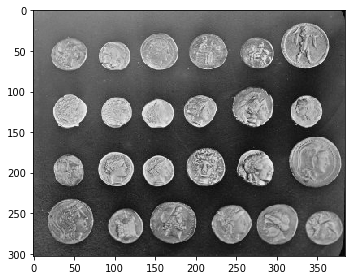

In [6]:
plt_img(img_coins)

#### Método de leitura de imagem local

In [7]:
'''
Parameters: 
- Path: The image should be in the working directory or a full path of image
should be given;
- color: Second argument is a flag which specifies the way image should be read.
    cv2.IMREAD_COLOR : Loads a color image. Any transparency of image
    will be neglected;
    cv2.IMREAD_GRAYSCALE : Loads image in grayscale mode;
    cv2.IMREAD_UNCHANGED : Loads image as such including alpha channel;
Note Instead of these three flags, you can simply pass integers 1, 0 or -1
respectively.
Output:
- img_array: (ndarray)
'''
def open_img(path, color):
    return cv2.imread(path, color)

In [8]:
img_paisagem = open_img('paisagem.jpg', 0)

In [9]:
img_paisagem

array([[215, 184, 183, ..., 184, 184, 184],
       [170, 139, 138, ..., 139, 139, 139],
       [168, 137, 136, ..., 137, 137, 137],
       ...,
       [150,  90,  98, ...,  98,  98,  98],
       [150,  90,  98, ...,  98,  98,  98],
       [150,  90,  98, ...,  98,  98,  98]], dtype=uint8)

#### Visualização da imagem: img_paisagem 

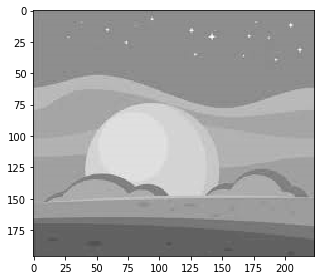

In [10]:
plt_img(img_paisagem)

# Questão 1

#### Histograma
Um histograma é um gráfico de frequência que tem por objetivo ilustrar como uma determinada amostra ou população de dados está distribuída. No problema tratado, utiliza-se o histograma para analisarmos a frequência dos pixels, o que nos ajuda a analisar os níveis de cores predominante na imagem. O eixo X contém os níveis de cores da imagem, o eixo Y contém a frequência de cada valor (nível de cor) na imagem.

#### Método para criar histograma a partir de qualquer matriz de pixels

In [11]:
'''
Parameters: 
    - img_matrix: (ndarray)
Output:
    - dict: (pixel: frequency)
    - Histogram plot - grayscale 
'''
def histogram(img_matrix):
    frequency_dict = {}
    for index_rows in range(0, img_matrix.shape[0]):
        for index_col in range(0, img_matrix.shape[1]):
            if img_matrix[index_rows][index_col] in frequency_dict:
                frequency_dict[img_matrix[index_rows][index_col]] += 1
            else:
                frequency_dict[img_matrix[index_rows][index_col]] = 1
                
    plot_histogram(frequency_dict)
    return frequency_dict

#### Método para realizar o plot do histograma a partir de um dicionário de frequências. Utiliza-se pacote: matplotlib.pyplot

In [12]:
'''
Parameters: 
    - dict: (pixel: frequency)
Output:
    - Histogram plot - grayscale 
'''
def plot_histogram(frequency_dict):
    plt.figure(figsize=(7,3))
    plt.bar(frequency_dict.keys(), frequency_dict.values(), width=.5, color='g')
    plt.xlabel('pixel')
    plt.ylabel('frequency')
    plt.axhline(np.mean(list(frequency_dict.values())), 
                color='b', linestyle='--', label='mean')
    plt.axhline(np.median(list(frequency_dict.values())), 
                color='r', linestyle='--', label='median')
    plt.legend()

##### Exemplo: histograma da imagem: img_coins

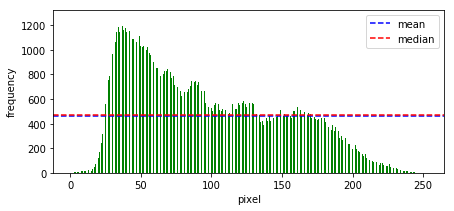

In [13]:
frequency_dict_img_coins = histogram(img_coins)

##### Exemplo: histograma da imagem: img_paisagem

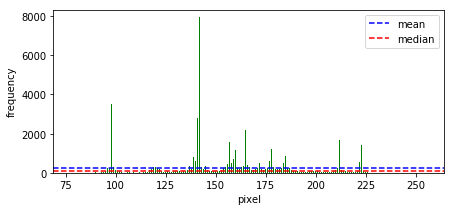

In [14]:
frequency_dict_img_paisagem = histogram(img_paisagem)

# Questão 2

#### Alteração pixels: clareamento/escurecimento
Para a alteração do nível de cor de uma imagem (clareamento ou escurecimento) é necessário apenas alterar o valor original de todos os pixels (de uma matriz) considerando uma constante. De tal modo que, ao subtrairmos um valor constante de todos os pixels teremos o escurecimento da imagem original, ao contrário teremos o clareamento da imagem. 

#### Método para alterar os pixels de uma imagem

In [15]:
'''
Parameters: 
- img_matrix: (ndarray)
- change_level: constant that indicates the level of change in the pixel.
Negative values result in darkening of the image.

Output:
- resulting matrix: (ndarray)
'''
def change_color(img_matrix, change_level):
    resulting_img_matrix = img_matrix.copy()
    for index_rows in range(0, img_matrix.shape[0]):
        for index_col in range(0, img_matrix.shape[1]):
            if img_matrix[index_rows][index_col] + change_level <= 0:
                resulting_img_matrix[index_rows][index_col] = 0
            elif img_matrix[index_rows][index_col] + change_level >= 255:
                resulting_img_matrix[index_rows][index_col] = 255
            else:
                resulting_img_matrix[index_rows][index_col] = \
                img_matrix[index_rows][index_col] + change_level
    
    return resulting_img_matrix

##### Imagem Original

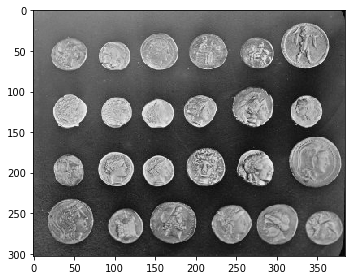

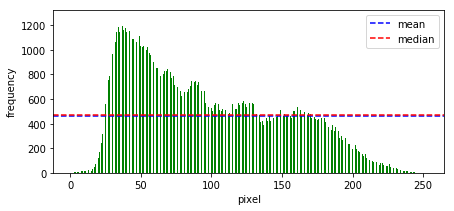

In [16]:
plt_img(img_coins)
frequency_dict_img_coins = histogram(img_coins)

##### Imagem resultante após clareamento: +25

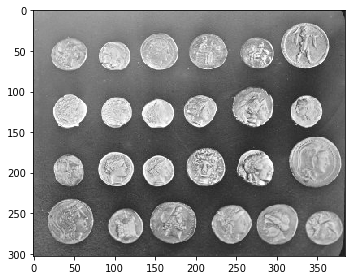

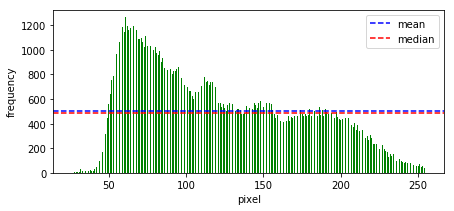

In [17]:
resulting_img_matrix_whitening = change_color(img_coins, +25)
plt_img(resulting_img_matrix_whitening)
frequency_dict_resulting_whitening = histogram(resulting_img_matrix_whitening)

##### Imagem resultante após escurecimento: -25

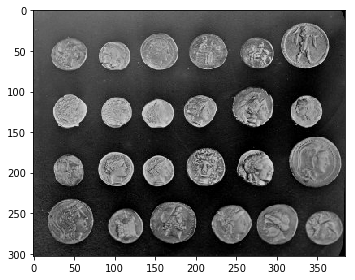

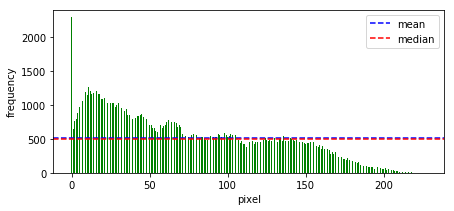

In [18]:
resulting_img_darkening = change_color(img_coins, -25)
plt_img(resulting_img_darkening)
frequency_dict_resulting_darkening = histogram(resulting_img_darkening)

# Questão 3-a

#### Filtro de mediana
O Filtro de mediana é utilizado para suavizar ruídos numa imagem. Para tal, considera-se uma vizinhança ao redor de cada pixel e atribuí ao pixel o valor da mediana. Os mais comuns são: vizinhança de 4, diagonal e de 8. A escolha da vizinhança é determinante para o efeito do filtro, pois cada vizinhança determina em diferentes pixels à serem considerados para a atualização.


#### Método para filtro de mediana - sem considerar as bordas 

In [19]:
'''
Parameters: 
- img_matrix: (ndarray)
- neighborhood: string that indicates the neighborhood:
    '4': N4(p)- (x+1,y), (x-1,y), (x,y+1), (x,y-1);
    'D': ND(p)- (x+1,y+1), (x+1,y-1), (x-1,y+1), (x-1,y-1);
    '8': N4(p) U ND(p);

Output:
- resulting matrix: (ndarray)
'''
def median_filter(img_matrix, neighborhood):
    
    if neighborhood == '4':
        get_neighborhood = neighborhood_4
    elif neighborhood == 'D':
        get_neighborhood = neighborhood_D
    elif neighborhood == '8':
        get_neighborhood = neighborhood_8
    else:
        print('favor informar valor correto para vizinhança.')
        return 'favor informar valor correto para vizinhança.'
    
    resulting_img_matrix = img_matrix.copy()
    for index_rows in range(1, img_matrix.shape[0]-1):
        for index_col in range(1, img_matrix.shape[1]-1):
            tmp_neighborhood = get_neighborhood(img_matrix, index_rows, index_col)
            resulting_img_matrix[index_rows][index_col] = np.median(tmp_neighborhood)
    
    return resulting_img_matrix



def neighborhood_4(matrix, index_rows, index_col):
    median_4 = []
    median_4.extend([matrix[index_rows][index_col], 
                     matrix[index_rows-1][index_col], 
                     matrix[index_rows][index_col-1], 
                     matrix[index_rows][index_col+1], 
                     matrix[index_rows+1][index_col]])
    return median_4
    
def neighborhood_D(matrix, index_rows, index_col):
    median_D = []
    median_D.extend([matrix[index_rows][index_col], 
                     matrix[index_rows-1][index_col-1], 
                     matrix[index_rows-1][index_col+1], 
                     matrix[index_rows+1][index_col-1], 
                     matrix[index_rows+1][index_col+1]])
    return median_D
    
def neighborhood_8(matrix, index_rows, index_col):
    median_8 = []
    median_8.extend([matrix[index_rows][index_col], 
                     matrix[index_rows-1][index_col],
                     matrix[index_rows][index_col-1], 
                     matrix[index_rows][index_col+1],
                     matrix[index_rows+1][index_col], 
                     matrix[index_rows-1][index_col-1], 
                     matrix[index_rows-1][index_col+1], 
                     matrix[index_rows+1][index_col-1], 
                     matrix[index_rows+1][index_col+1]])
    return median_8

##### Imagem Original

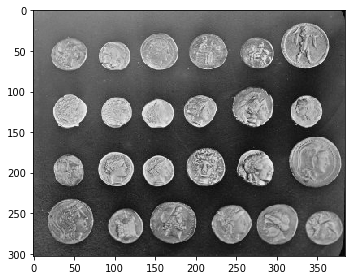

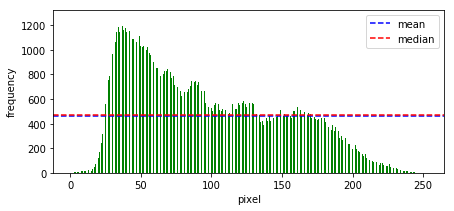

In [20]:
plt_img(img_coins)
frequency_dict_img_coins = histogram(img_coins)

#### Imagem resultante após filtro de mediana com vizinhança de 4

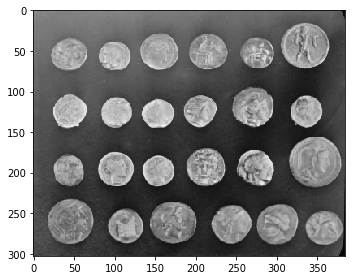

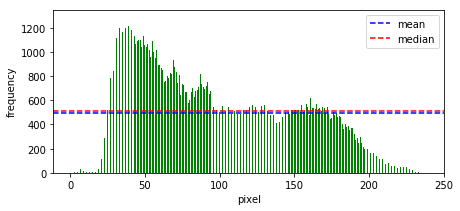

In [21]:
resulting_matrix_median_filter_4 = median_filter(img_matrix=img_coins, 
                                                 neighborhood='4')
plt_img(resulting_matrix_median_filter_4)
freq_dict_result_matrix_median_filter_4 = histogram(resulting_matrix_median_filter_4)

#### Imagem resultante após filtro de mediana com vizinhança diagonal

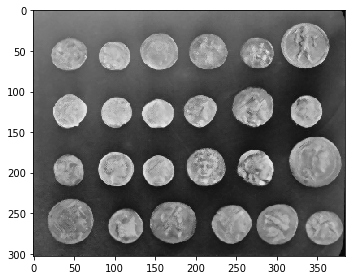

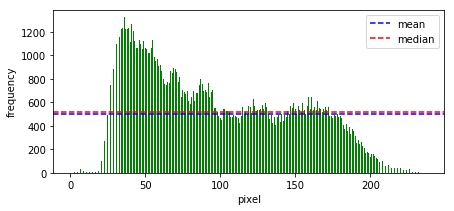

In [22]:
resulting_matrix_median_filter_D = median_filter(img_matrix=img_coins, 
                                                 neighborhood='D')
plt_img(resulting_matrix_median_filter_D)
freq_dict_result_matrix_median_filter_D = histogram(resulting_matrix_median_filter_D)

#### Imagem resultante após filtro de mediana com vizinhança de 8

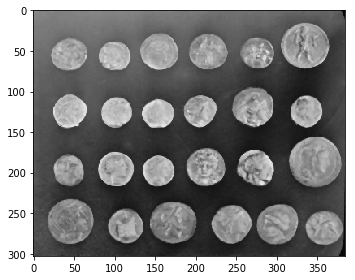

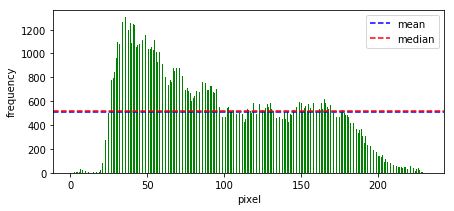

In [23]:
resulting_matrix_median_filter_8 = median_filter(img_matrix=img_coins, 
                                                 neighborhood='8')
plt_img(resulting_matrix_median_filter_8)
freq_dict_result_matrix_median_filter_8 = histogram(resulting_matrix_median_filter_8)

# Questão 3-b

#### Equalização
A Equalização tem como objetivo obter um histograma uniforme, para tal, realiza um "espalhamento" da distribuição dos níveis de cores de uma imagem. Ou seja, o filtro realiza um espaçamento de níveis de cores em cada região para aumentar o contraste, pixels com níveis de cores próximos são mapeados para um único valor. Com isso, as cores são realçadas, tanto para níveis de clareamento ou escurecimento.

#### Método para equalização

In [ ]:
'''
Parameters: 
- img_matrix: (ndarray)
Output:
- resulting matrix: (ndarray)
'''
def equalization(img_matrix):
    #1- calcular g - níveis de cinza
    freq_dict = frequency_dict(img_matrix)
    g = len(set(freq_dict.keys()))
    
    #2- calcular I
    I = (img_matrix.shape[0]*img_matrix.shape[1])/g
    
    #3- calcular dicionario de frequencia acumulado
    cumulative_freq_dict = {}
    total = 0
    for key in np.sort(list(freq_dict.keys())):
        total = total + freq_dict[key]
        cumulative_freq_dict[key] = total
    
    resulting_img_matrix = img_matrix.copy()
    #3- Substituir pixel a pixel pelo valor em Q:
    for index_rows in range(0, img_matrix.shape[0]):
        for index_col in range(0, img_matrix.shape[1]):
            q = max(0, round(
                cumulative_freq_dict[img_matrix[index_rows][index_col]]/I)-1)
            resulting_img_matrix[index_rows][index_col] = q
    
    
    return resulting_img_matrix
    
def frequency_dict(img_matrix):
    frequency_dict = {}
    for index_rows in range(0, img_matrix.shape[0]):
        for index_col in range(0, img_matrix.shape[1]):
            if img_matrix[index_rows][index_col] in frequency_dict:
                frequency_dict[img_matrix[index_rows][index_col]] += 1
            else:
                frequency_dict[img_matrix[index_rows][index_col]] = 1
    return frequency_dict

##### Imagem Original

In [ ]:
plt_img(img_coins)
frequency_dict_img_coins = histogram(img_coins)

##### Imagem resultante após filtro de equalização

In [ ]:
resulting_img_matrix_equalization = equalization(img_coins)
plt_img(resulting_img_matrix_equalization)
freq_dict_resul_equalization = histogram(resulting_img_matrix_equalization)